In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from extra_dists import ClippedUniform, MixtureMarginal, MixtureMarginal2D, TorusMarginal

def get_figure(extra_width=0):
    fig, ax = plt.subplots(1, 1, figsize=(3 + extra_width, 3))
    return fig, ax

def make_up_figure(axes, xlims, ylims, title, xlabel, ylabel):
    ax = axes
    # ax.set_title(title)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    # ax.set_xlabel(xlabel)
    # ax.set_ylabel(ylabel)
    # ax.set_aspect("equal")
    plt.tight_layout()



## 1D uniform

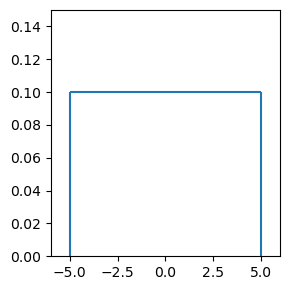

In [2]:
title = r"1D$_{uniform}$"
xlims = (-6, 6)
ylims = (0, 0.15)
xlabel = r"$\theta$"
ylabel = r"$p(\theta)$"

fig, axes = get_figure()
axes.hlines(0.1, -5, 5)
axes.vlines(-5, 0, 0.1)
axes.vlines(5, 0, 0.1)
# sns.kdeplot(uniform_samples, ax=axes)
make_up_figure(axes, xlims, ylims, title, xlabel, ylabel)
plt.savefig("img/1d-uniform.png")
plt.show()




## 1D mixture

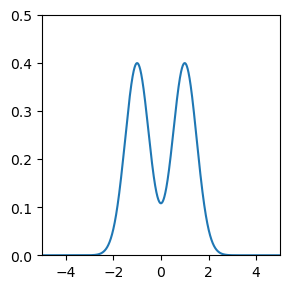

In [3]:
title = r"1D$_{mixture}$"
xlims = (-5, 5)
ylims = (0, 0.5)
xlabel = r"$\theta$"
ylabel = r"$p(\theta)$"

x = torch.linspace(-6, 6, 10000)
y1 = MixtureMarginal.gaussian_pdf(x, torch.tensor([-1]), torch.tensor([0.5]))
y2 = MixtureMarginal.gaussian_pdf(x, torch.tensor([1]), torch.tensor([0.5]))
y = 0.5 * (y1 + y2)

fig, axes = get_figure()
axes.plot(x, y)
# sns.kdeplot(uniform_samples, ax=axes)
make_up_figure(axes, xlims, ylims, title, xlabel, ylabel)
plt.savefig("img/1d-mixture.png")
plt.show()


## 2D mixture

/home/lo/anaconda3/envs/thesis/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1666642969563/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


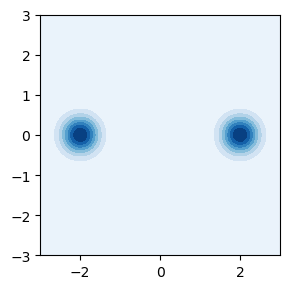

In [4]:
title = r"2D$_{mixture}$"
xlims = (-3, 3)
ylims = (-3, 3)
xlabel = r"$\theta_0$"
ylabel = r"$\theta_1$"

xy = torch.meshgrid(torch.linspace(-6, 6, 10000), torch.linspace(-6, 6, 10000))
xy_grid = torch.stack(xy, dim=-1)
cov = torch.tensor([[[0.1, 0.0], [0.0, 0.1]]])

z1 = torch.distributions.MultivariateNormal(torch.tensor([[-2, 0]]), cov).log_prob(xy_grid).exp()
z2 = torch.distributions.MultivariateNormal(torch.tensor([[2, 0]]), cov).log_prob(xy_grid).exp()
z = 0.5 * (z1 + z2)

fig, axes = get_figure()
axes.contourf(xy[0], xy[1], z, cmap="Blues")
# CS_2dmix = axes.contourf(xy[0], xy[1], z, cmap="Blues")
# cbar_2dmix = fig.colorbar(CS_2dmix)
# cbar_2dmix.ax.set_ylabel(r"$p(\theta)$")
# sns.kdeplot(uniform_samples, ax=axes)
make_up_figure(axes, xlims, ylims, title, xlabel, ylabel)
plt.savefig("img/2d-mixture.png")
plt.show()

In [5]:
fig.get_size_inches()

array([3., 3.])

## 2D torus

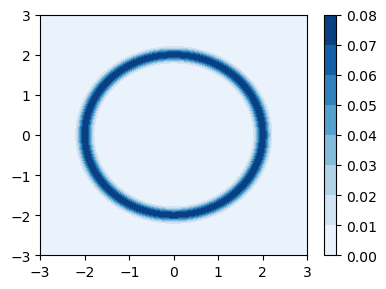

In [6]:
title = r"2D$_{torus}$"
xlims = (-3, 3)
ylims = (-3, 3)
xlabel = r"$\theta_0$"
ylabel = r"$\theta_1$"

N = 1000
xy = torch.meshgrid(torch.linspace(-6, 6, N), torch.linspace(-6, 6, N))
xy_grid = torch.stack(xy, dim=-1).view(-1, 2)

center = torch.tensor([0.0, 0.0])
radius = 2.0
std = 0.1


torus_marginal = TorusMarginal(center, radius, std)
z = torus_marginal.log_prob(xy_grid).exp().unsqueeze(0).view(N, N)

fig, axes = get_figure(extra_width=1)
CS_torus = axes.contourf(xy[0], xy[1], z, cmap="Blues")
cbar_torus = fig.colorbar(CS_torus)
# cbar_torus.ax.set_ylabel(r"$p(\theta)$")
# sns.kdeplot(uniform_samples, ax=axes)
make_up_figure(axes, xlims, ylims, title, xlabel, ylabel)
plt.savefig("img/2d-torus.png")
plt.show()